# Import Library

In [1]:
import cv2

# Image path 


In [2]:
test_image_path = "0.jfif"

# Read image


In [3]:
test_image = cv2.imread(test_image_path)

In [4]:
test_image = cv2.cvtColor(test_image,cv2.COLOR_BGR2RGB)

In [5]:
test_image

array([[[ 49, 124, 191],
        [ 49, 124, 191],
        [ 49, 124, 191],
        ...,
        [ 55, 136, 202],
        [ 55, 136, 202],
        [ 55, 136, 202]],

       [[ 49, 124, 191],
        [ 49, 124, 191],
        [ 49, 124, 191],
        ...,
        [ 55, 136, 202],
        [ 55, 136, 202],
        [ 55, 136, 202]],

       [[ 49, 124, 191],
        [ 49, 124, 191],
        [ 49, 124, 191],
        ...,
        [ 55, 136, 202],
        [ 55, 136, 202],
        [ 55, 136, 202]],

       ...,

       [[189, 197, 216],
        [189, 197, 216],
        [189, 197, 216],
        ...,
        [196, 204, 223],
        [194, 205, 223],
        [194, 205, 223]],

       [[186, 197, 217],
        [186, 197, 217],
        [186, 197, 217],
        ...,
        [196, 204, 223],
        [196, 204, 223],
        [196, 204, 223]],

       [[186, 197, 217],
        [186, 197, 217],
        [186, 197, 217],
        ...,
        [196, 204, 223],
        [196, 204, 223],
        [196, 204, 223]]

# Extracting the height and width of an image


In [6]:
h, w, color = test_image.shape
# Displaying the height and width
print(h, w, color)

1250 1000 3


# Extracting RGB values. 


In [7]:
# Here we have randomly chosen a pixel
# by passing in 100, 100 for height and width.
(R, G, B) = test_image[100, 100]
  
# Displaying the pixel values
print("R = {}, G = {}, B = {}".format(R, G, B))

R = 51, G = 126, B = 194


# ROI

In [8]:
# by slicing the pixels of the image
roi = test_image[0 : -1, 200 : 700]

# Plot

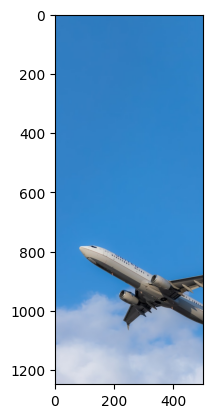

In [9]:
import matplotlib.pyplot as plt
plt.imshow(roi)
#cv2.imshow("window name", image) .py

In [10]:
test_image_resize = cv2.resize(test_image, (500, 600), interpolation = cv2.INTER_LINEAR)
test_image_resize.shape

(600, 500, 3)

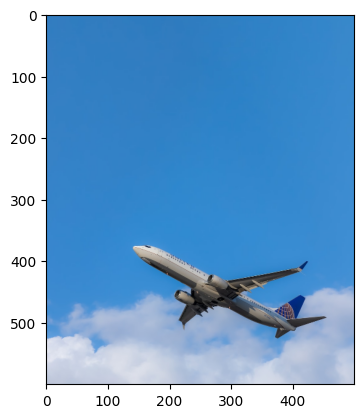

In [11]:
plt.imshow(test_image_resize)

In [12]:
# Calculating the ratio
ratio = 600 / w
  
# Creating a tuple containing width and height
dim = (800, int(h * ratio))
  
# Resizing the image
resize_aspect = cv2.resize(test_image_resize, dim)

resize_aspect.shape

(750, 800, 3)

In [13]:
# Calculating the center of the image
center = (w // 2, h // 2)
  
# Generating a rotation matrix
matrix = cv2.getRotationMatrix2D(center, -40, 1.0) 
  
# Performing the affine transformation
rotated = cv2.warpAffine(test_image_resize, matrix, (w, h))

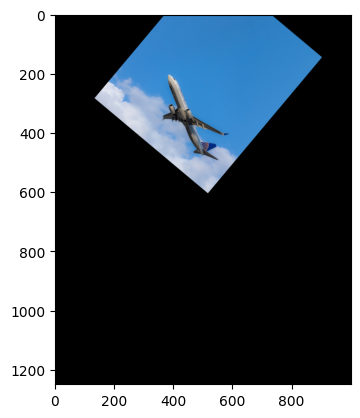

In [14]:
plt.imshow(rotated)

In [15]:
test_image_resize.shape

(600, 500, 3)

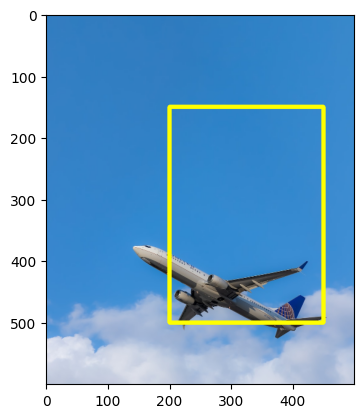

In [16]:
#copying image
test_copy = test_image_resize.copy()
  
# Using the rectangle() function to create a rectangle.
rectangle_img = cv2.rectangle(test_copy, (200, 150), (450, 500), (255, 255, 0), 5)

plt.imshow(rectangle_img)

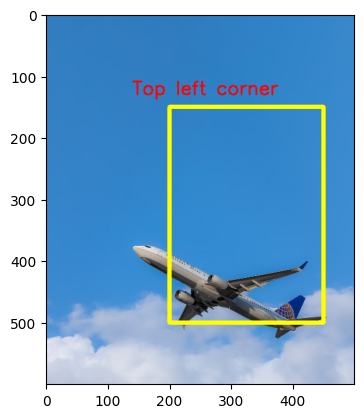

In [17]:
rec_copy = rectangle_img.copy()

# Adding the text using putText() function
text_img = cv2.putText(rec_copy, 'Top left corner', (140,130), 
                                    cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 0, 0), 2)

plt.imshow(text_img)

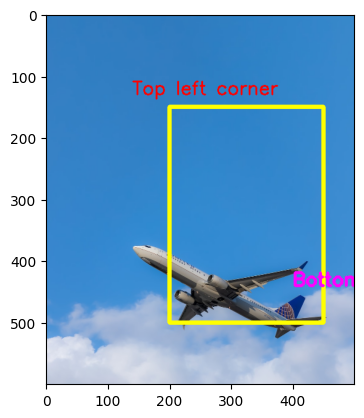

In [18]:
text_copy_4 = text_img.copy()

# Adding the text using putText() function
text_image = cv2.putText(text_copy_4, 'Bottom right corner', (400,440), 
                                    cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 0, 255), 3)

plt.imshow(text_image)

# Kernels

In [19]:
import numpy as np

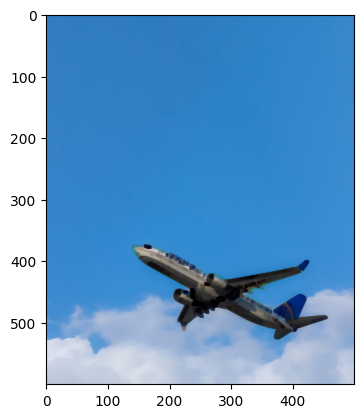

In [20]:
#Eroding
kernel = np.ones((5, 5), np.uint8)
  
# Using cv2.erode() method 
image = cv2.erode(test_image_resize, kernel) 
  
# Displaying the image 
plt.imshow(image)

# Gaussian Blur

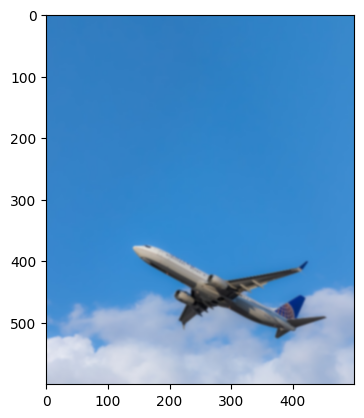

In [21]:

Gaussian = cv2.GaussianBlur(test_image_resize, (7, 7), 0)
plt.imshow(Gaussian)

# Median Blur

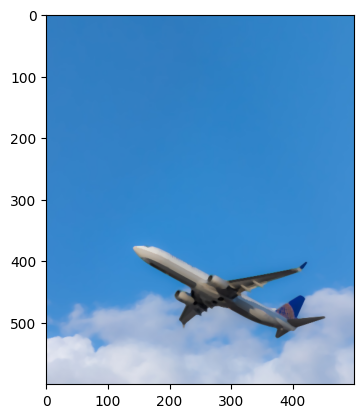

In [22]:

median = cv2.medianBlur(test_image_resize, 5)
plt.imshow(median)

# Bilateral Blur

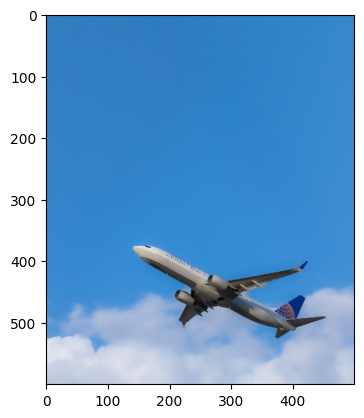

In [23]:

bilateral = cv2.bilateralFilter(test_image_resize, 9, 75, 75)
plt.imshow(bilateral)

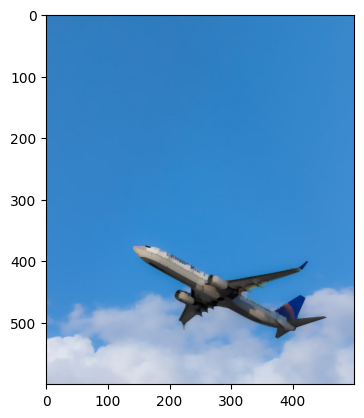

In [24]:
kernel = np.ones((5, 5), np.uint8)
 
# The first parameter is the original image,
# kernel is the matrix with which image is
# convolved and third parameter is the number
# of iterations, which will determine how much
# you want to erode/dilate a given image.
img_erosion = cv2.erode(test_image_resize, kernel, iterations=1)
img_dilation = cv2.dilate(img_erosion, kernel, iterations=1)
 
plt.imshow(test_image_resize)
plt.imshow(img_erosion)
plt.imshow(img_dilation)

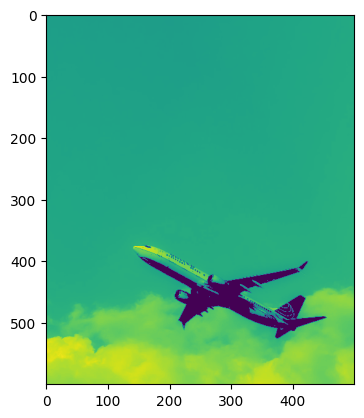

In [25]:
img = cv2.cvtColor(test_image_resize, cv2.COLOR_BGR2GRAY)
 
# applying different thresholding
# techniques on the input image
# all pixels value above 120 will
# be set to 255
# ret, thresh1 = cv2.threshold(img, 120, 255, cv2.THRESH_BINARY)
# ret, thresh2 = cv2.threshold(img, 120, 255, cv2.THRESH_BINARY_INV)
# ret, thresh3 = cv2.threshold(img, 120, 255, cv2.THRESH_TRUNC)
ret, thresh4 = cv2.threshold(img, 120, 255, cv2.THRESH_TOZERO)
# ret, thresh5 = cv2.threshold(img, 120, 255, cv2.THRESH_TOZERO_INV)
 
# the window showing output images
# with the corresponding thresholding
# techniques applied to the input images
# plt.imshow(thresh1)
# plt.imshow(thresh2)
# plt.imshow(thresh3)
plt.imshow(thresh4)
# plt.imshow(thresh5)
plt.show()